In [1]:
from data.datamapping import *
from lvtlaw.h_loadoutput import *
from lvtlaw.g_result import *
file_name = '123_Cepheids'
n=123
dis = ['_g', '_j']
data_p=f'./data/processed/{file_name}{dis[0]}_{R_v}{ex_law}/'
data_j=f'./data/processed/{file_name}{dis[1]}_{R_v}{ex_law}/'
resultp, r_regp, resp, prep = calibrated_result_(data_p, n)
resultj, r_regj, resj, prej = calibrated_result_(data_j, n)
#resultp.head(2).style

* * datamapping module loaded!
* * a_utils module loaded!
* * datamapping module loaded!
* * datamapping module loaded!


* * c_pl_pw module loaded!
./docs/reports/plots/2_PLPW/123_Cepheids_0BVIJHK_g.pdf


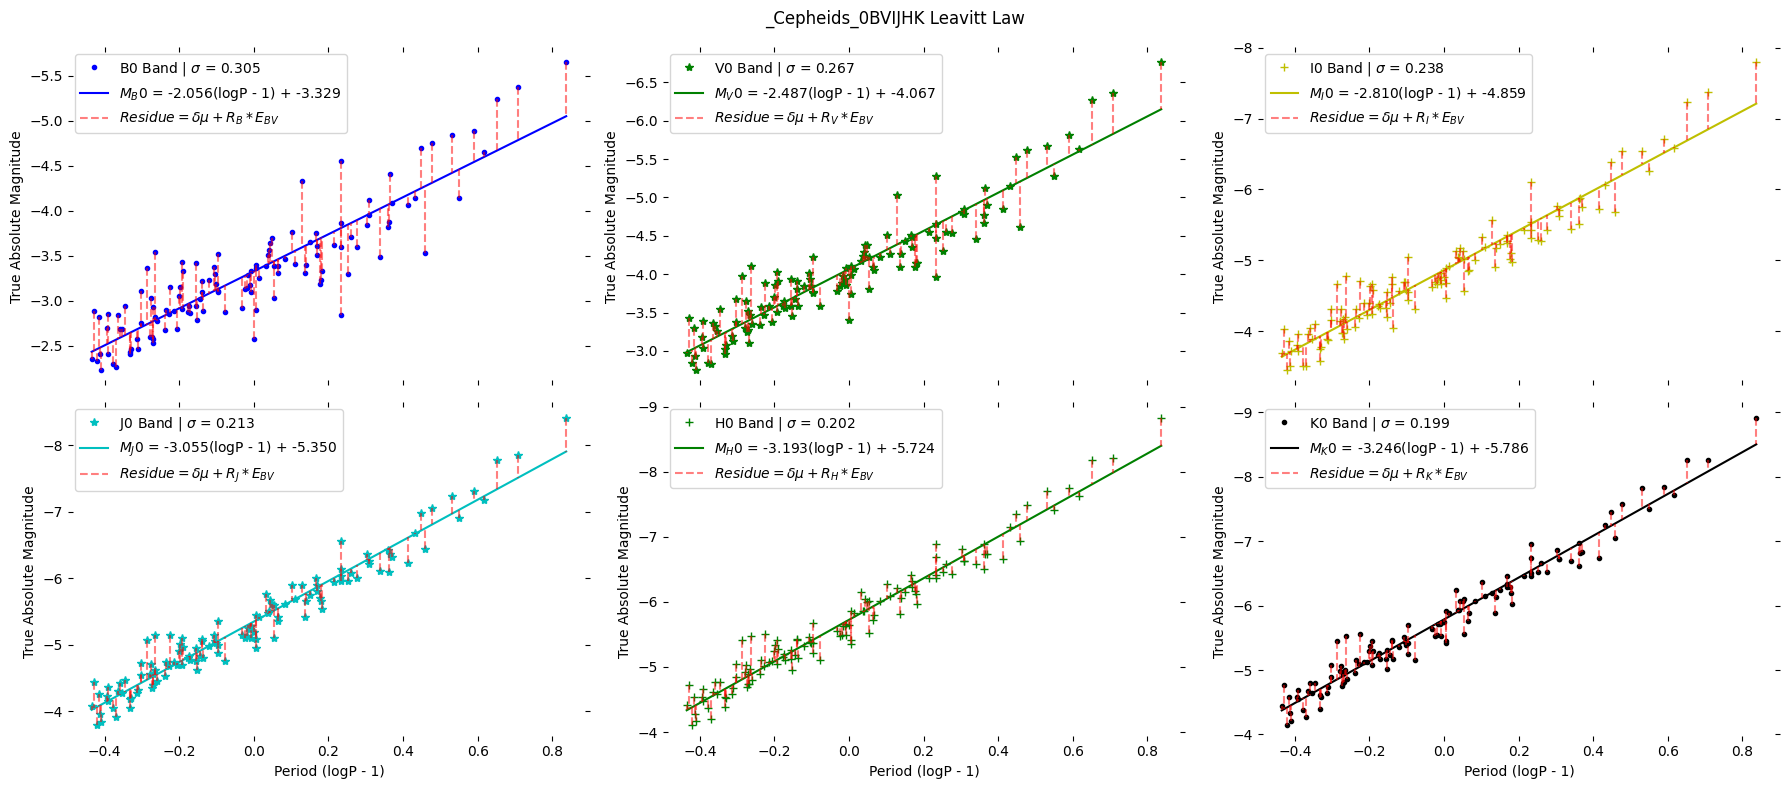

./docs/reports/plots/2_PLPW/123_Cepheids_BVIJHK_0_g_residuals.pdf


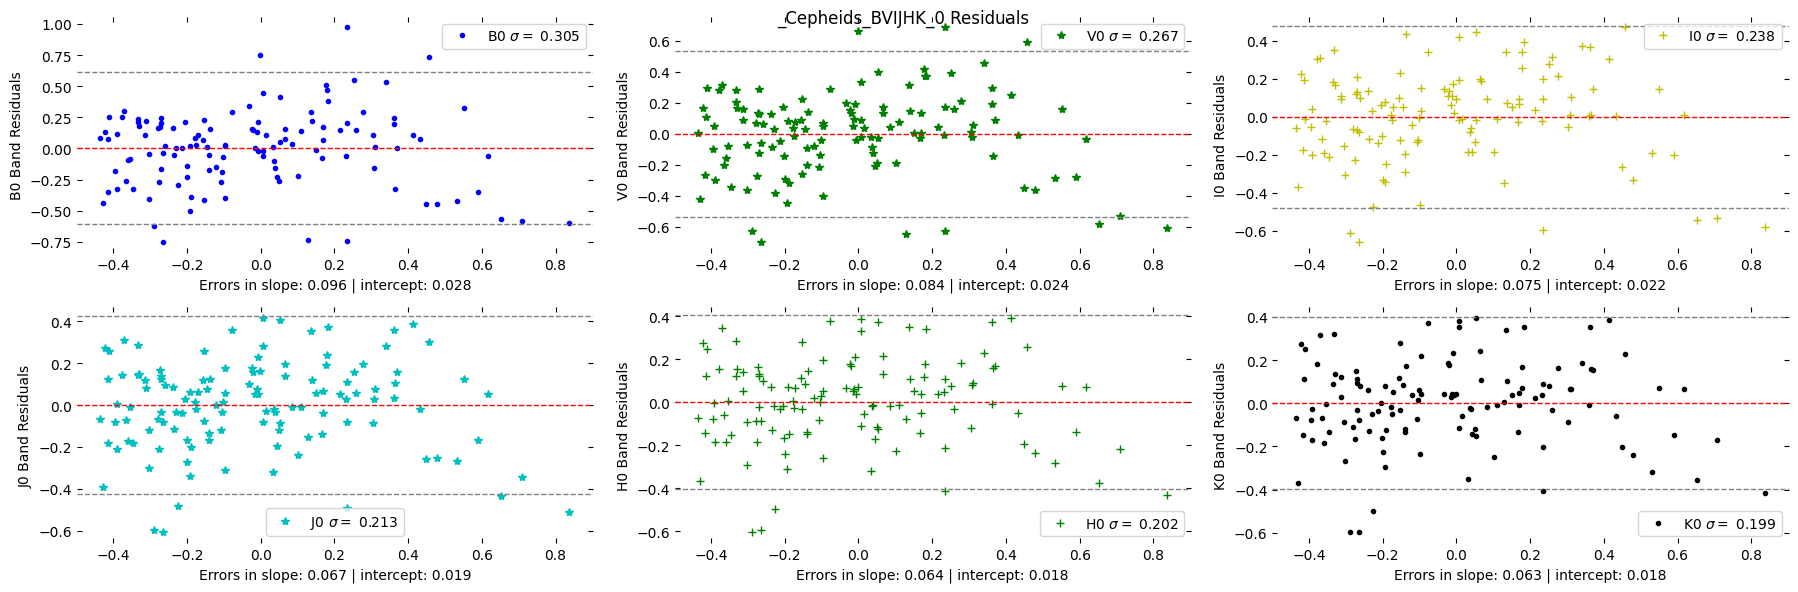

In [2]:
from lvtlaw.c_pl_pw import plotPL6, plotPW6, plotPLWres
from lvtlaw.h_loadoutput import *
PLWregression, PLWresidue, PLWprediction, merged_data=PLWcorrection_() # 1
#plotPL6(merged_data, PLWregression, ab = '')
plotPL6(merged_data, PLWregression, ab = '0')

Wesenheit  VK
./docs/reports/plots/2_PLPW/123_Cepheids_VK_BVIJHK_g.pdf


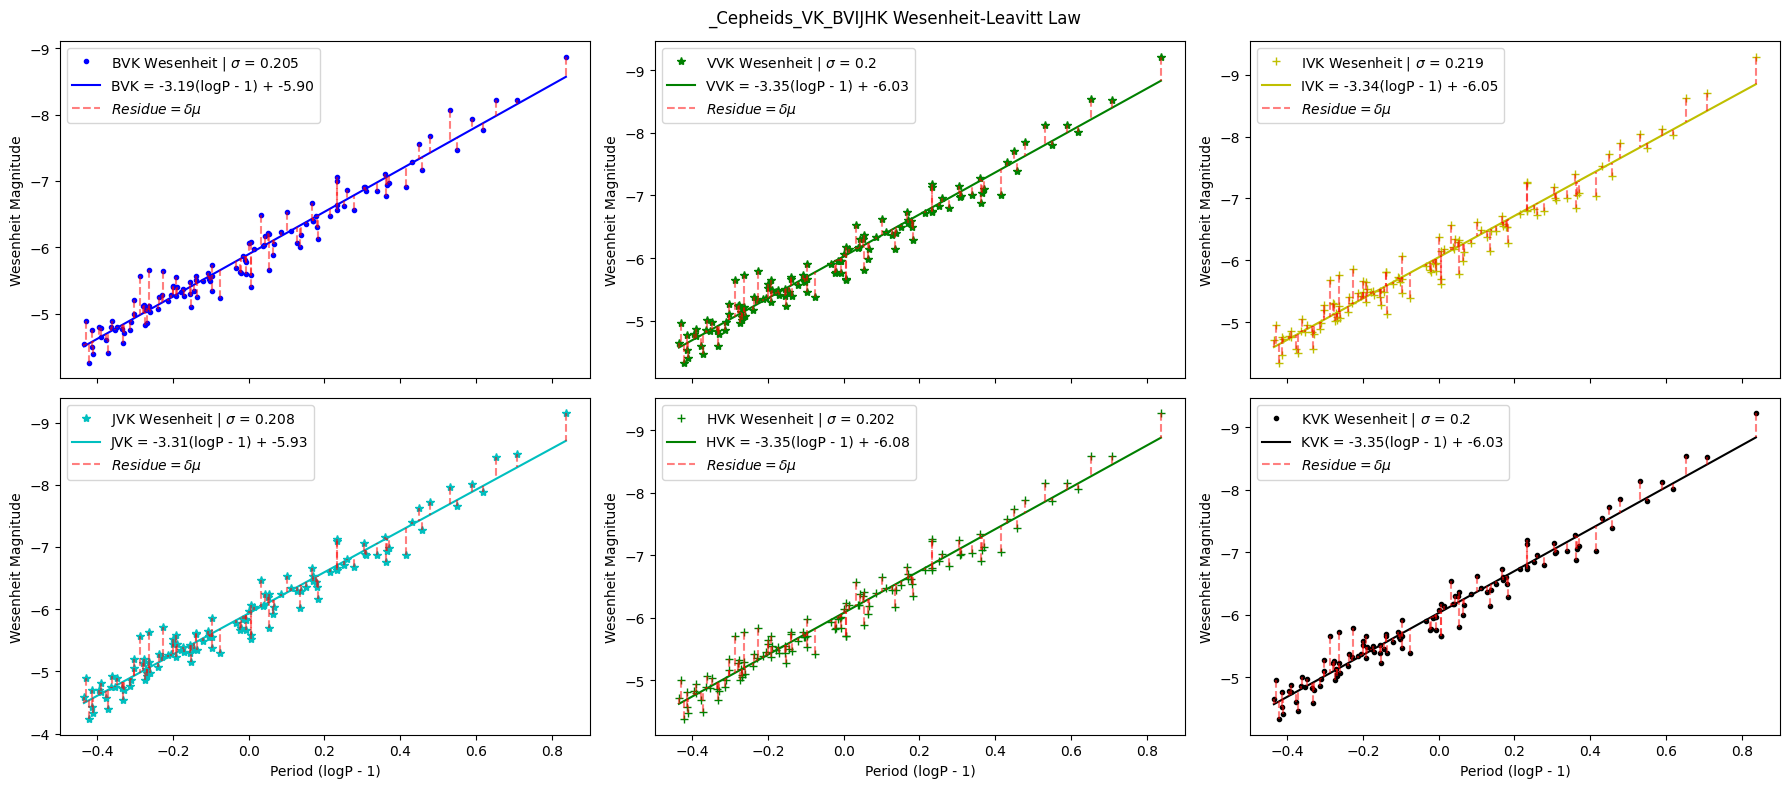

./docs/reports/plots/2_PLPW/123_Cepheids_BVIJHK_VK_g_residuals.pdf


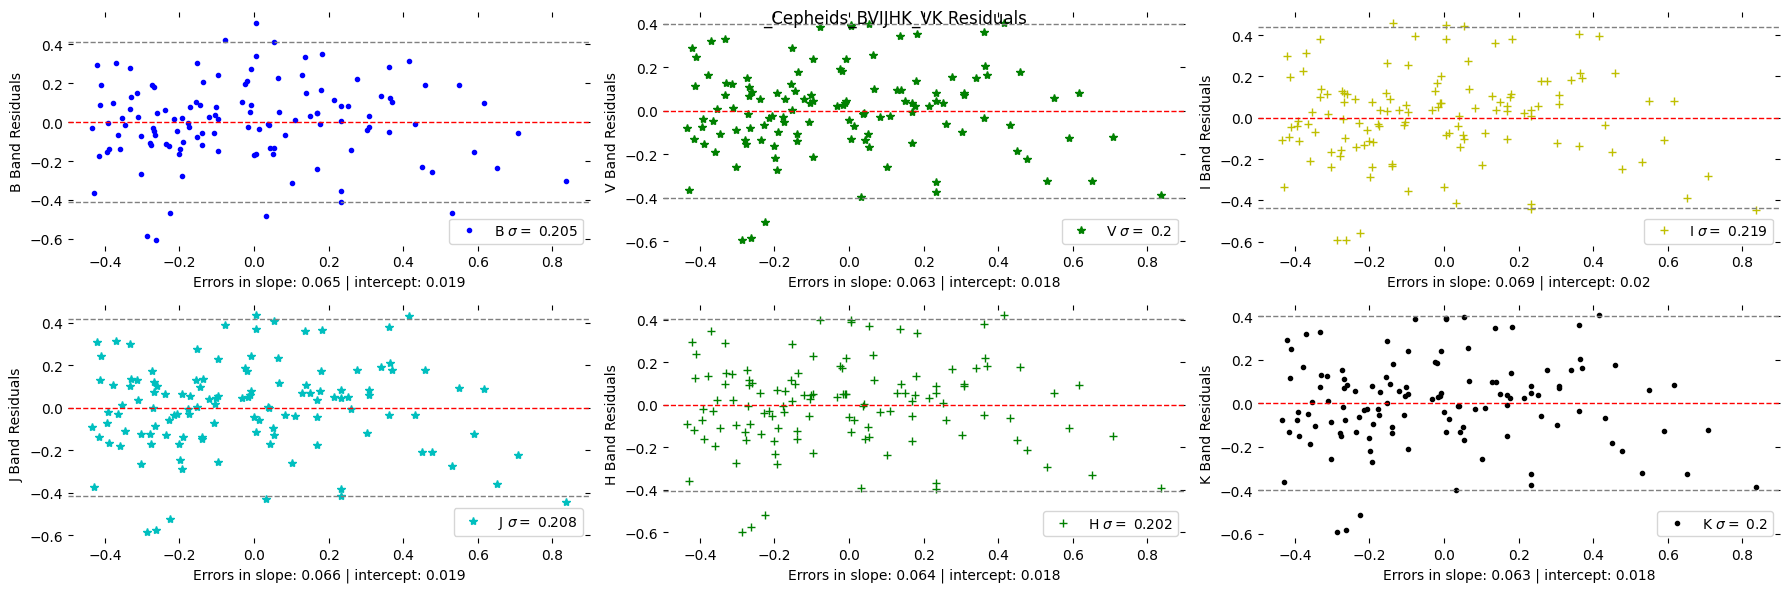

[None]

In [4]:
[plotPW6(merged_data, PLWregression, col) for col in ['VK']]

* * d_del_del module loaded!
For Wesenheit:
VJ
./docs/reports/plots/3_deldel/123_Cepheids_deldel_S_0VJ_g.pdf


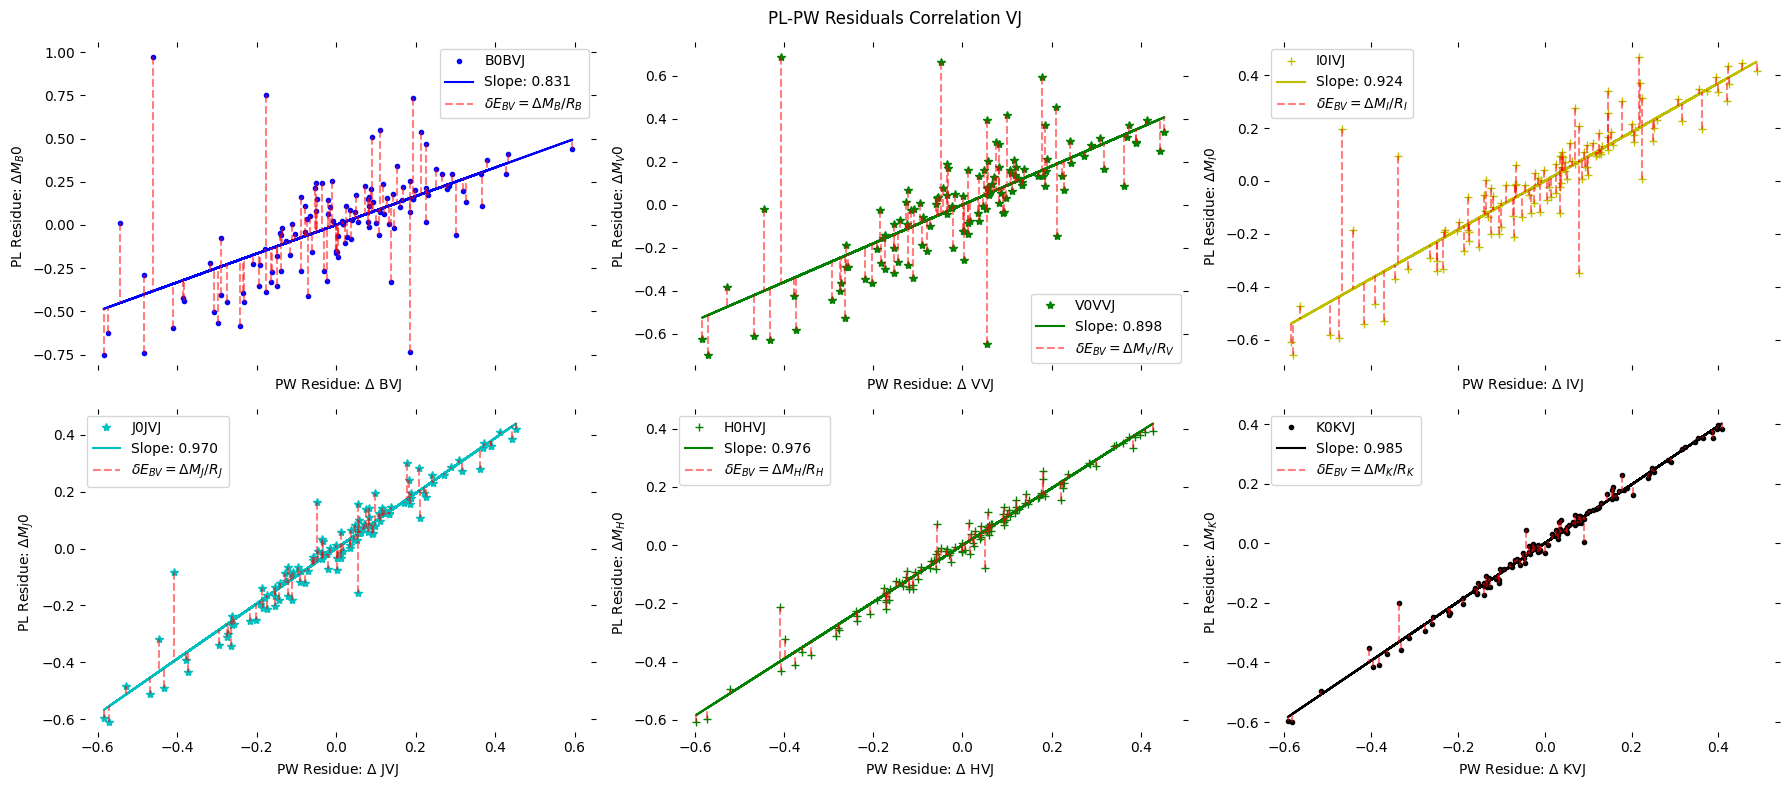

VK
./docs/reports/plots/3_deldel/123_Cepheids_deldel_S_0VK_g.pdf


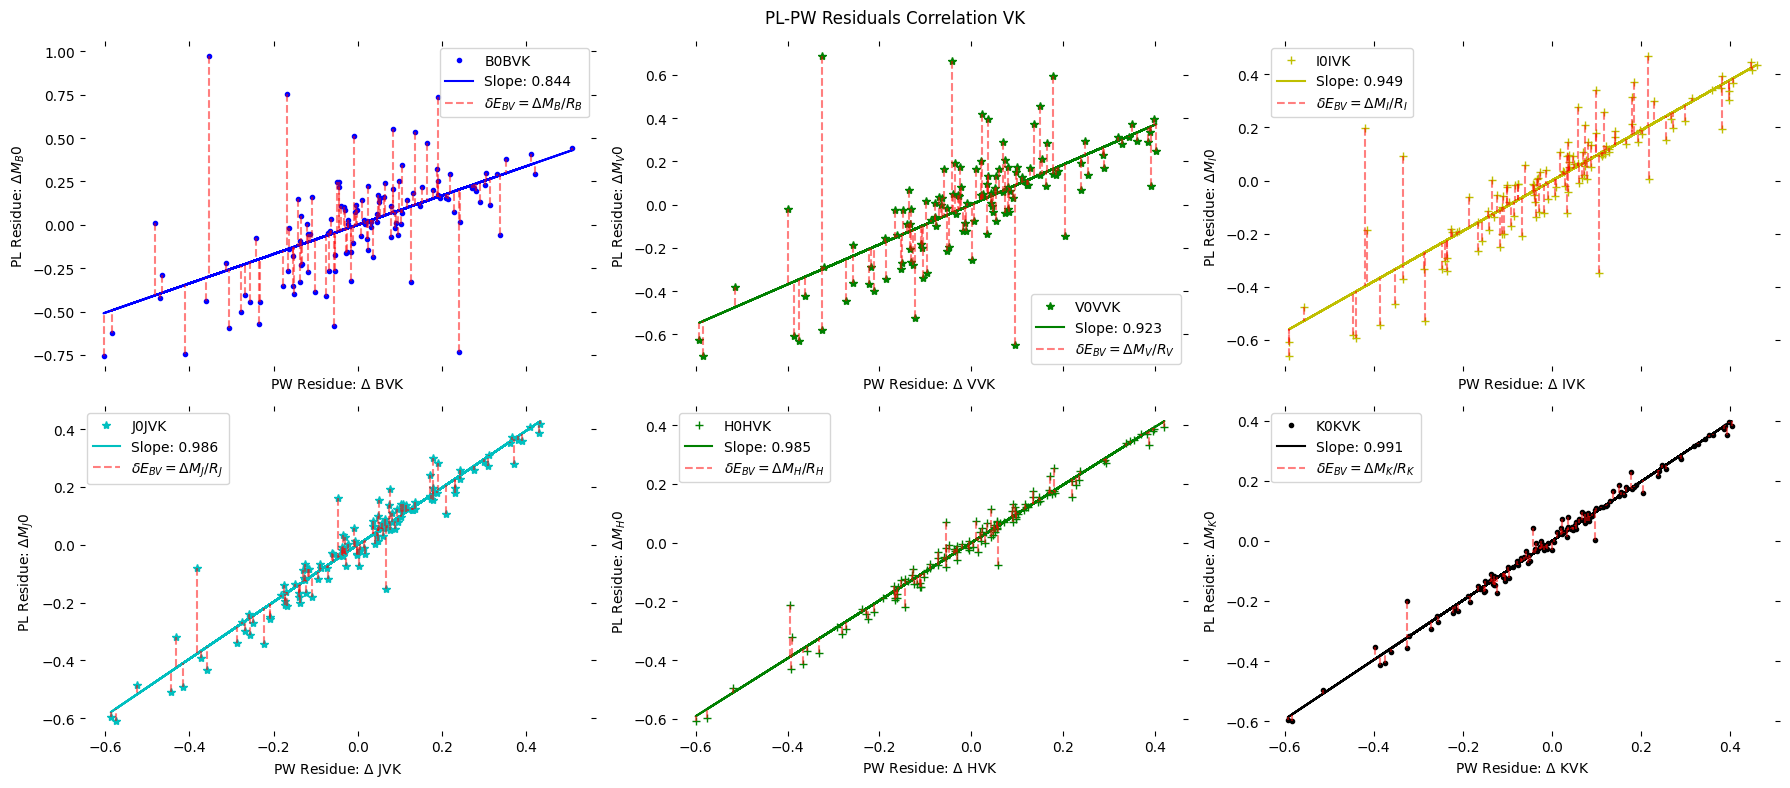

[None, None]

In [5]:
from lvtlaw.d_del_del import plotdeldel6
from lvtlaw.h_loadoutput import *
dmc, dpre, dres, merged_data = residual_correlation_() #2
print(f'For Wesenheit:')
[plotdeldel6(merged_data, dmc, col, dis, 'S', '0', 1) for col in ['VJ', 'VK']]

./docs/reports/plots/8_result/123_Cepheids_PL0_SVJ_g.pdf


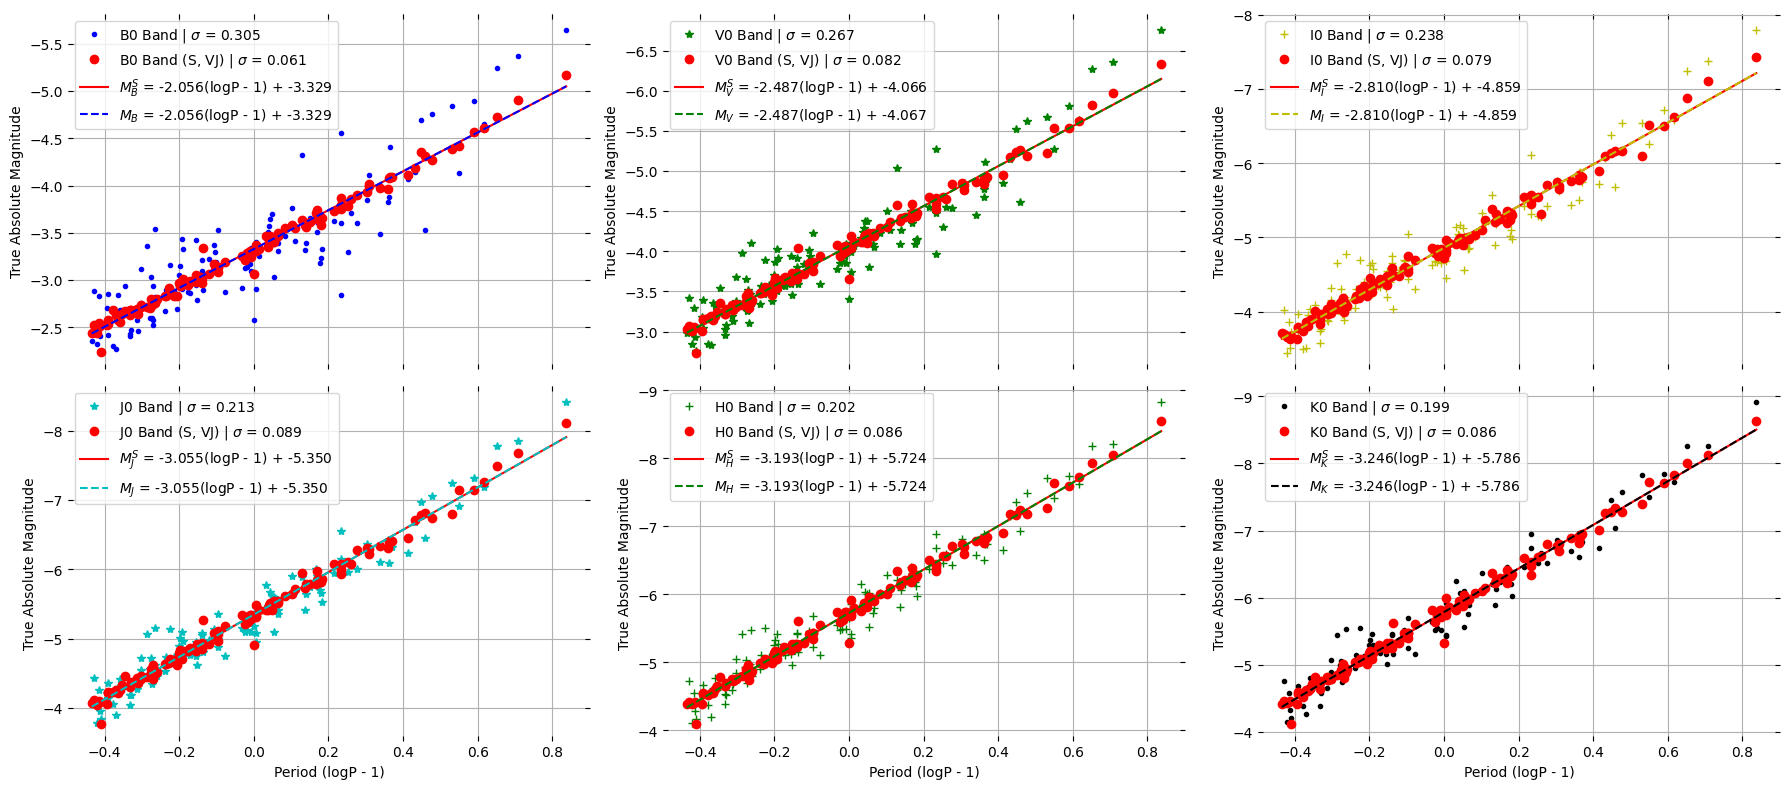

./docs/reports/plots/8_result/123_Cepheids_PL0_SVJ_j.pdf


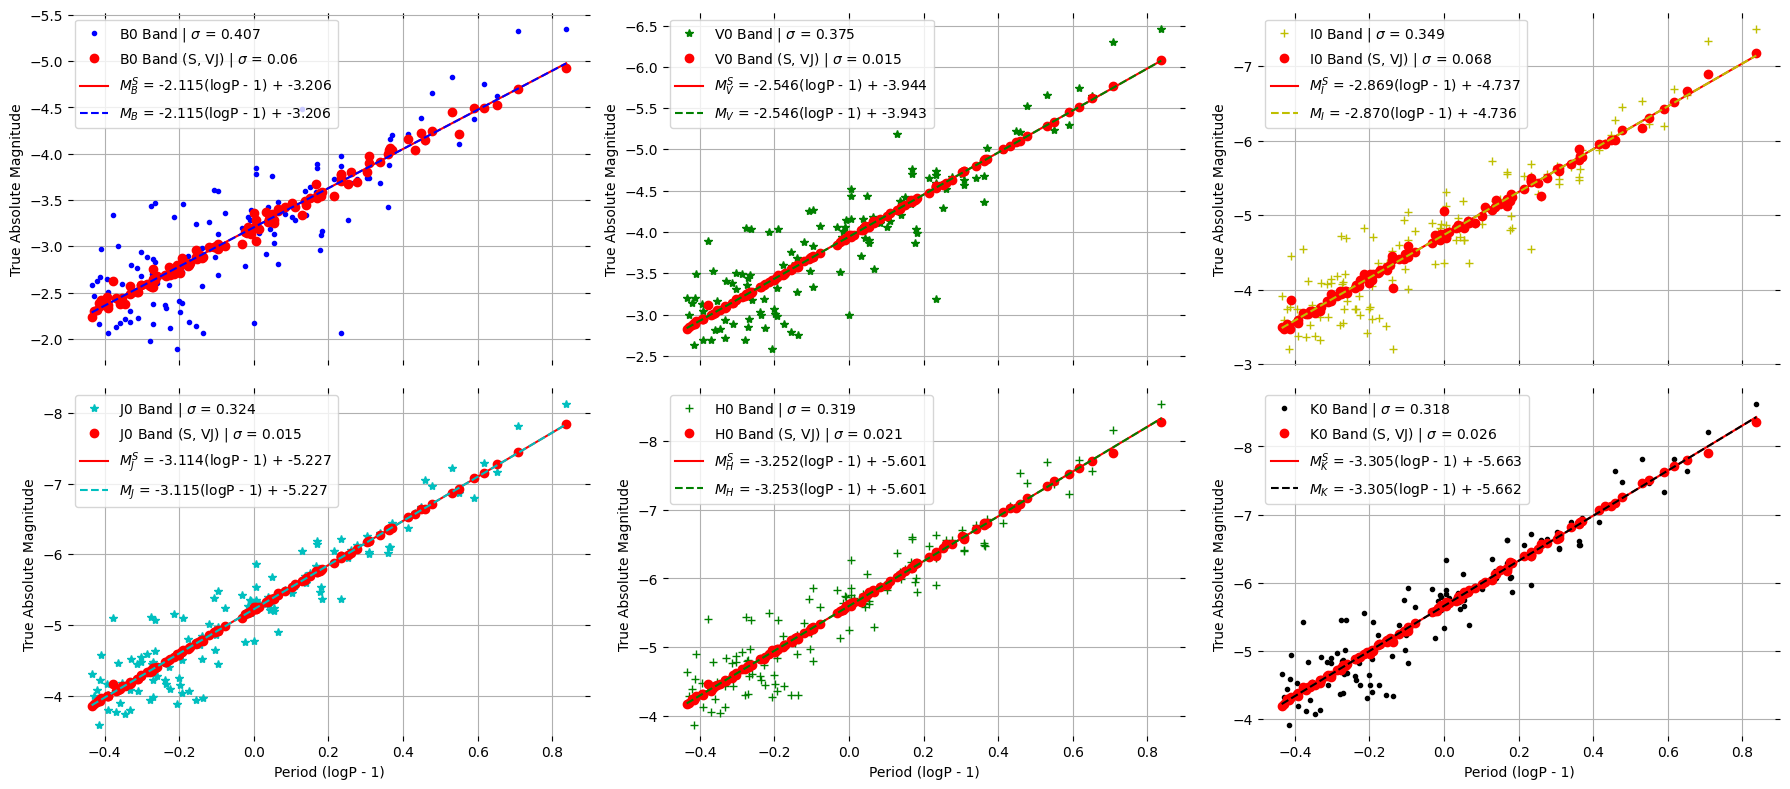

./docs/reports/plots/8_result/123_Cepheids_PL0_SVK_g.pdf


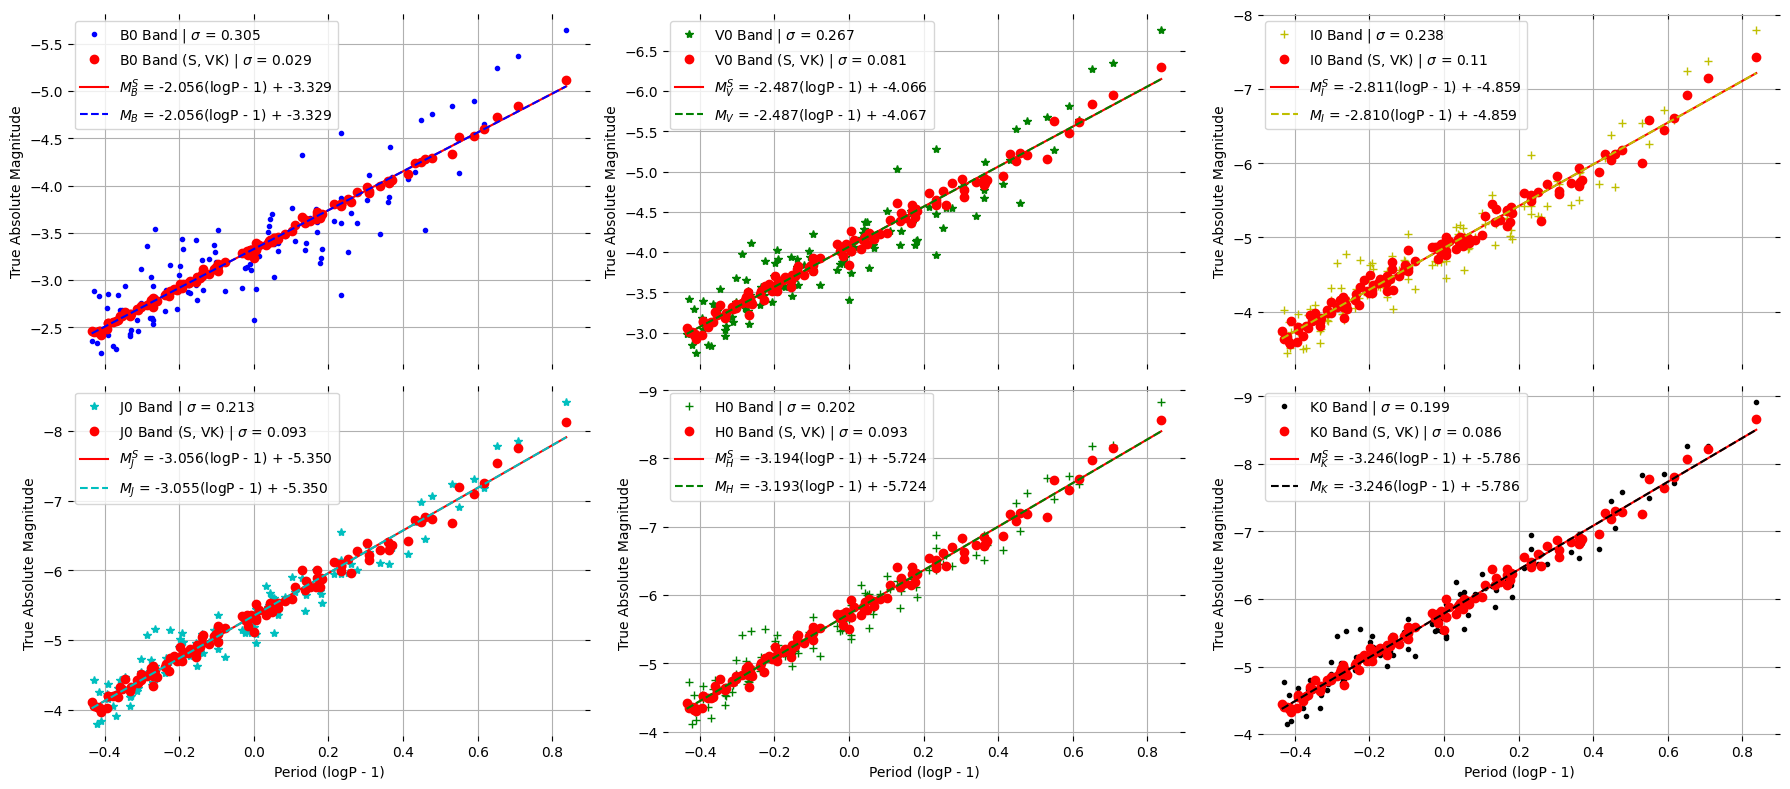

./docs/reports/plots/8_result/123_Cepheids_PL0_SVK_j.pdf


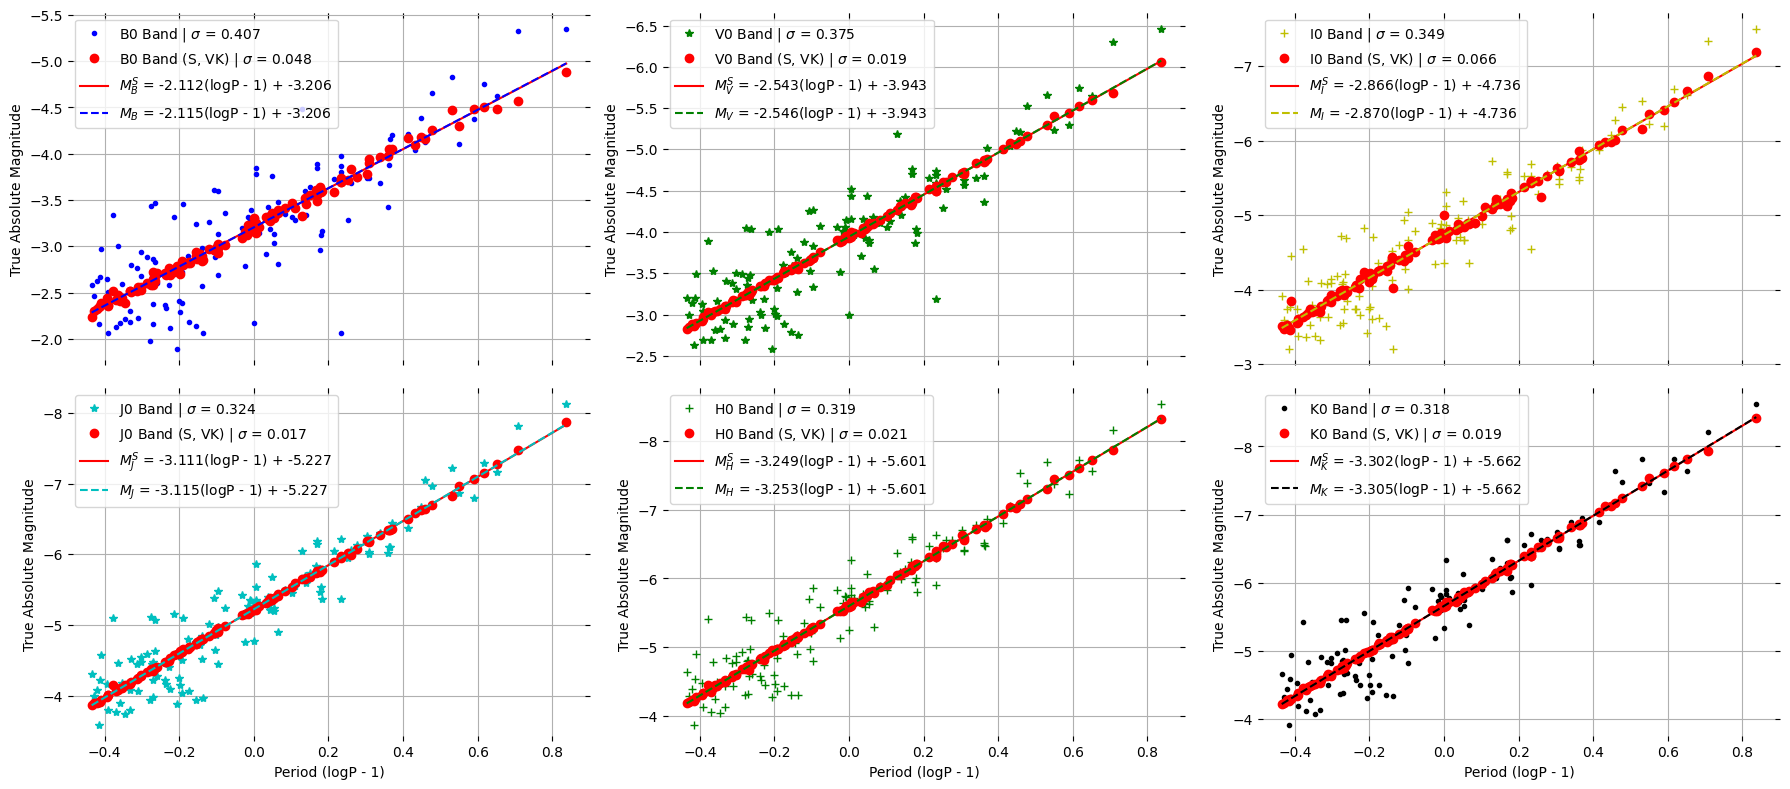

In [23]:
for col in ['VJ', 'VK']:
    x=1
    plotresultPL6_(resultp, r_regp, col, dis[0], 'S', '0',1)
    plotresultPL6_(resultj, r_regj, col, dis[1], 'S', '0',1)

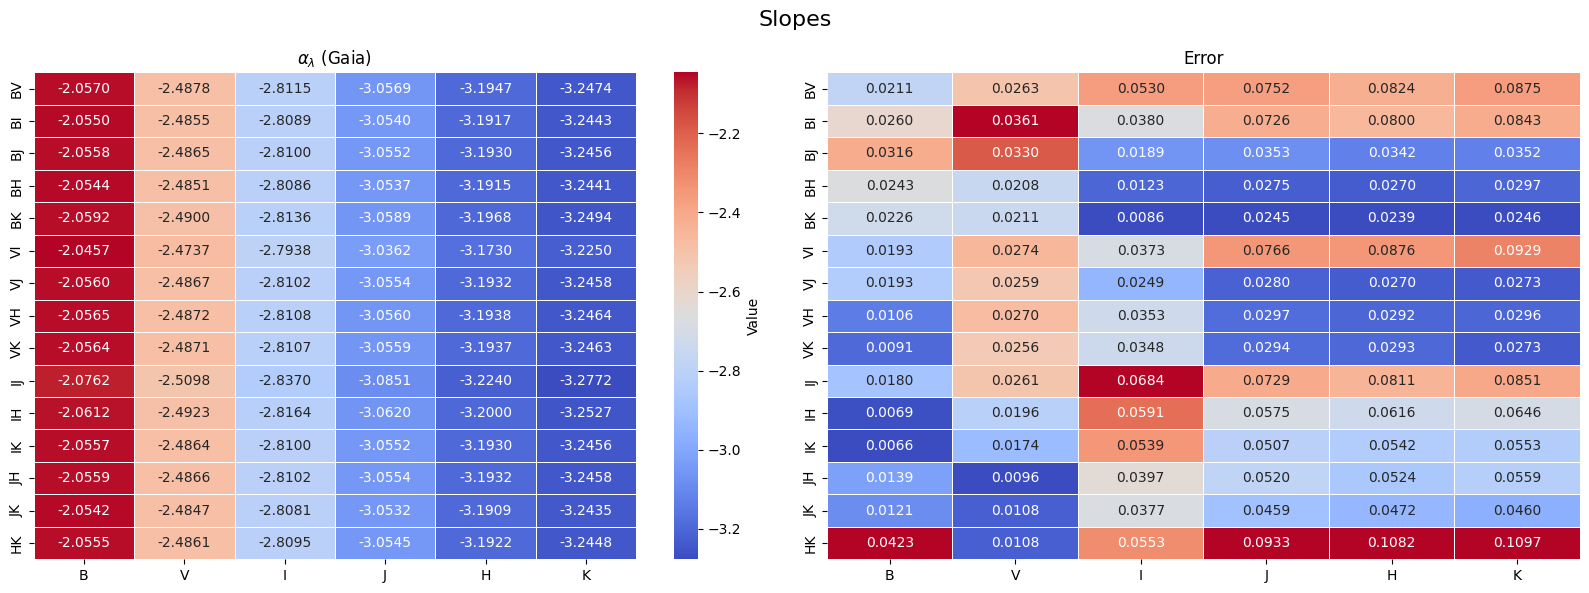

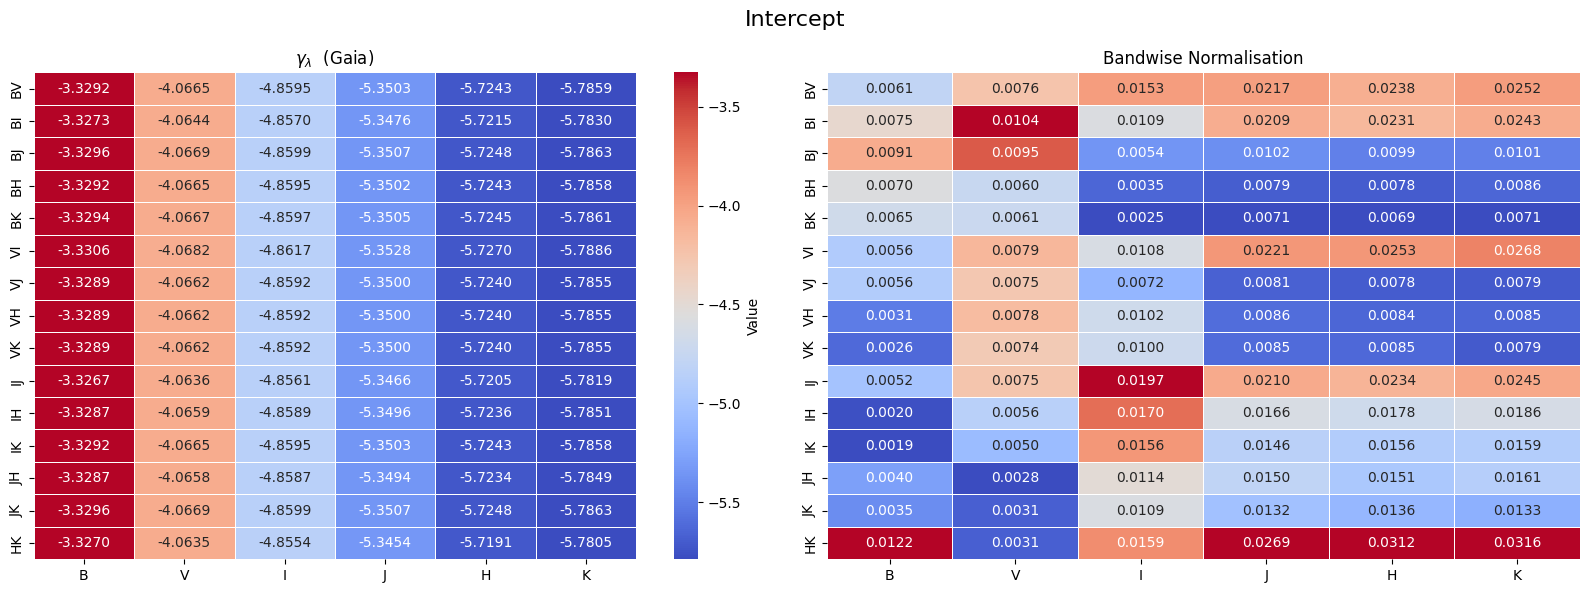

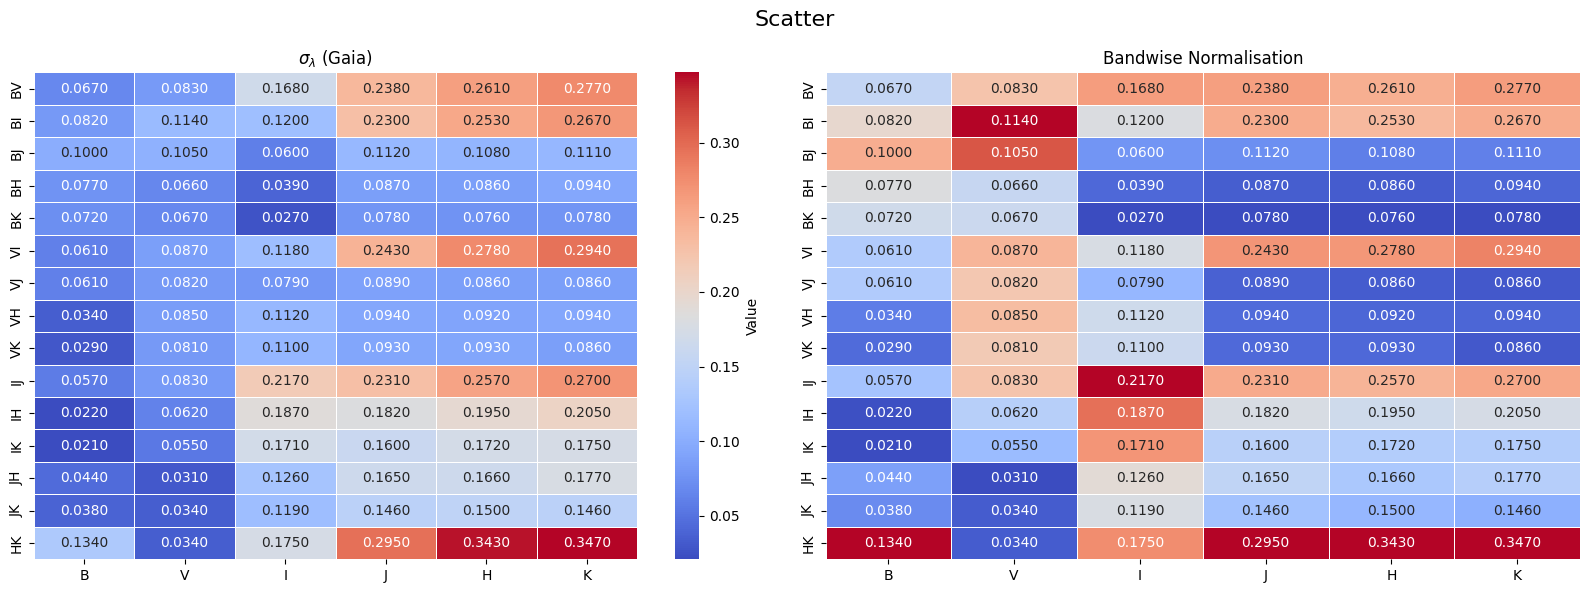

In [2]:
namep = file_name+dis[0]+ex_law
sp , ip, esp, eip, sdp =print_PL(r_regp, file_name, wes_show)
heatmap_compare(sp, esp, title = 'Slopes', left='$\\alpha_\\lambda$ (Gaia)', right= 'Error', name=namep, s=0 )
heatmap_compare(ip, eip, title = 'Intercept', left='$\\gamma_\\lambda$  (Gaia)', right= 'Bandwise Normalisation', name=namep,s=0 )
heatmap_compare(sdp,sdp, title = 'Scatter', left='$\\sigma_\\lambda$ (Gaia)', right= 'Bandwise Normalisation', name=namep, s=0 )

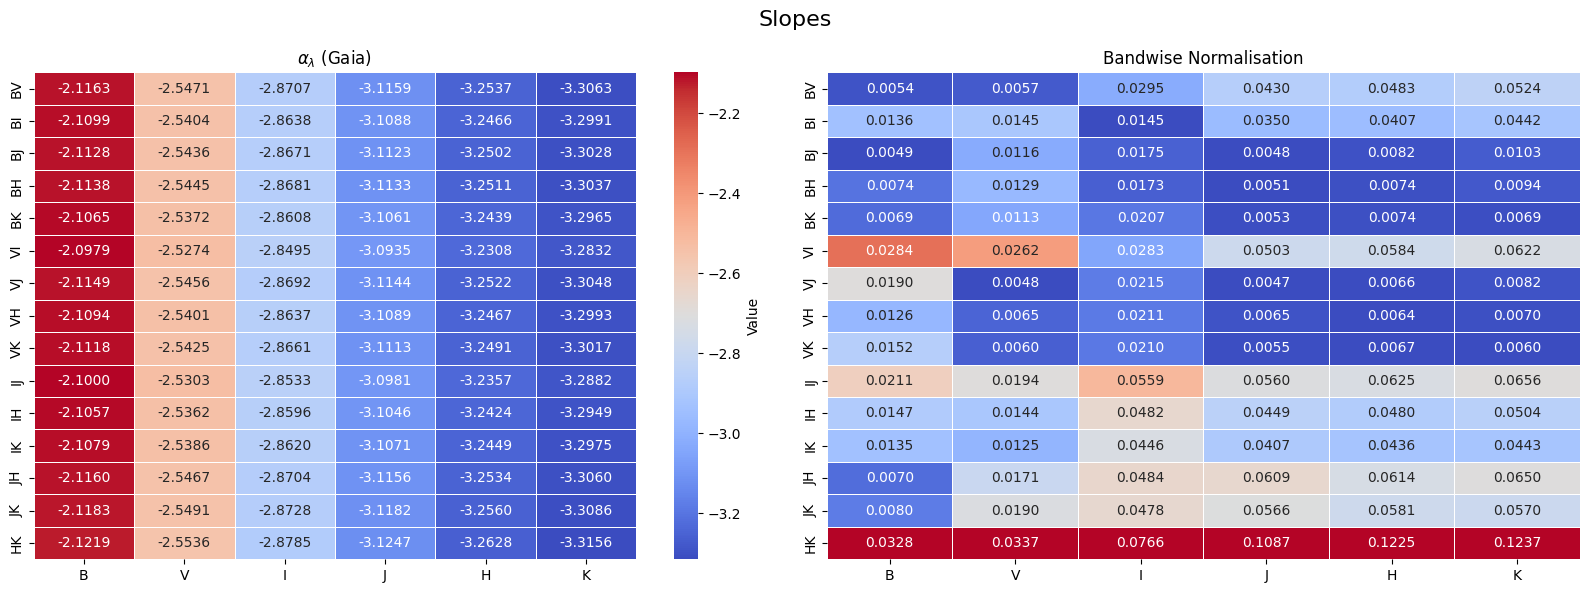

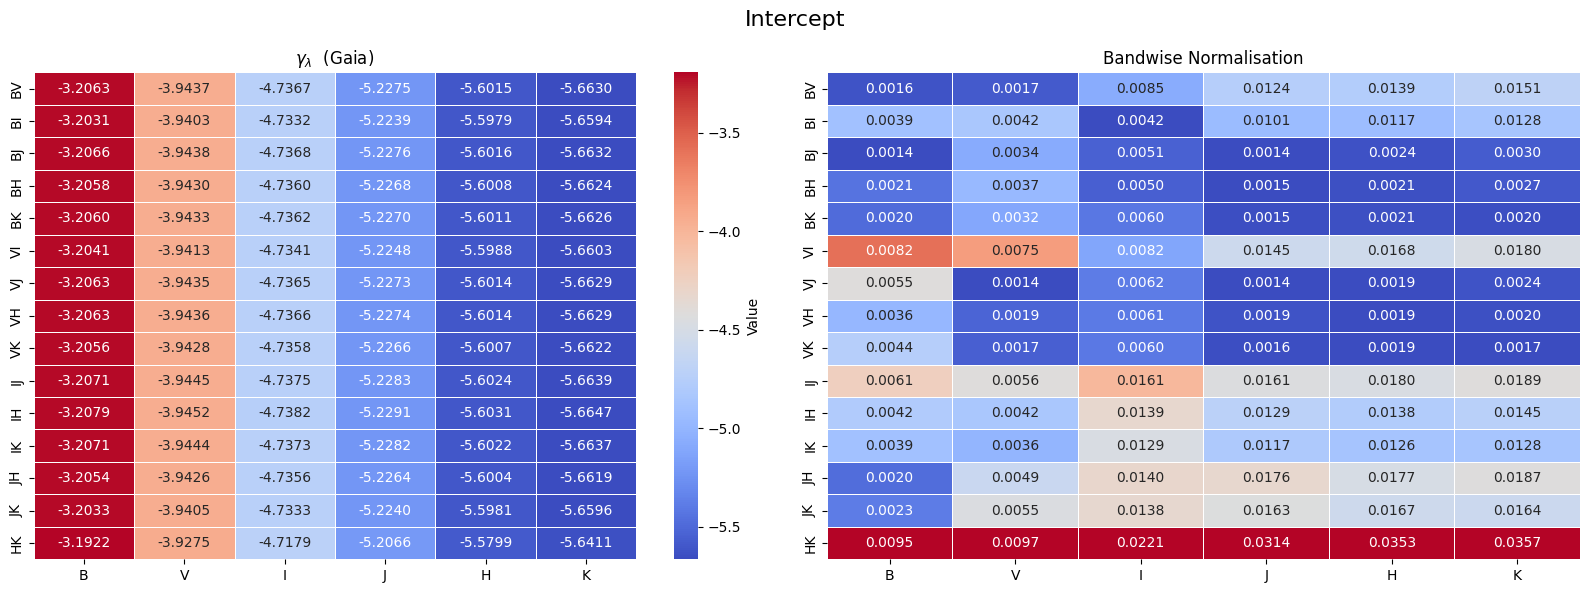

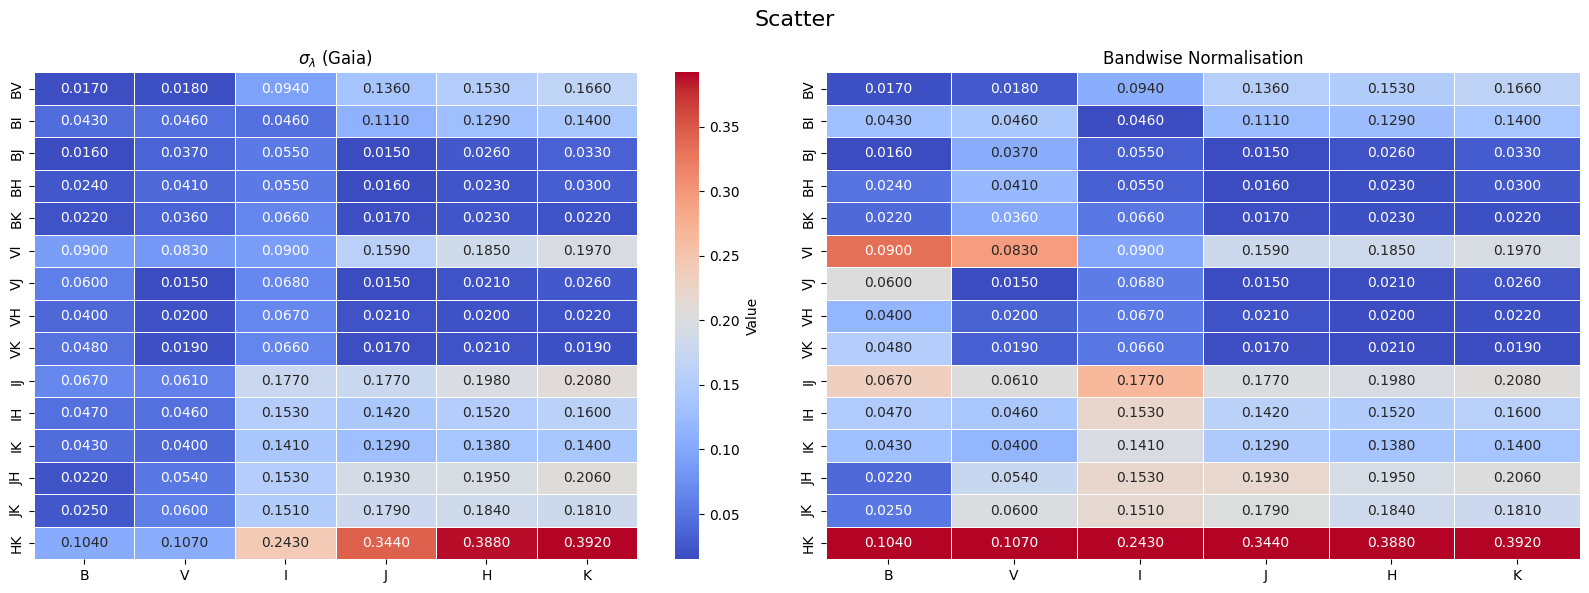

In [16]:
namej = file_name+dis[1]+ex_law
sj , ij, esj, eij, sdj =print_PL(r_regj, file_name, wes_show)
heatmap_compare(sj, esj, title = 'Slopes', left='$\\alpha_\\lambda$ (Gaia)', right= 'Bandwise Normalisation', name=namej, s=0 )
heatmap_compare(ij, eij, title = 'Intercept', left='$\\gamma_\\lambda$  (Gaia)', right= 'Bandwise Normalisation', name=namej,s=0 )
heatmap_compare(sdj, sdj, title = 'Scatter', left='$\\sigma_\\lambda$ (Gaia)', right= 'Bandwise Normalisation', name=namej, s=0 )

In [11]:
resultj.head(2).style

./docs/reports/plots/1_datacleaning/123_dis_dev_.pdf


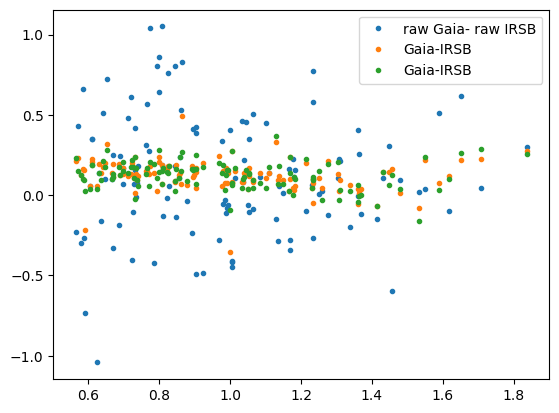

In [21]:
plt.plot(resultj['logP'], resultp['mMplx'] - resultj['mM0'], '.', label = 'raw Gaia- raw IRSB')
plt.plot(resultj['logP'], resultp['muS0VJ_g'] - resultj['muS0VJ_j'], '.', label = 'Gaia-IRSB')
plt.plot(resultj['logP'], resultp['muS0VK_g'] - resultj['muS0VK_j'], '.', label = 'Gaia-IRSB')
imgsave(title='123_dis_dev_')
plt.legend()
#plt.plot(resultj['logP'], resultp['rdS0VK_g'] - resultj['rdS0VK_j'], '.')

# Distance Deviation

In [6]:
X=data['logP']
Y=data.IRSB - data.gplx
plt.plot(X, data.HST - data.IRSB, label = 'HST-IRSB')
plt.plot(X, data.HST - data.gplx, label = 'HST-gplx')
plt.plot(X, Y, label = 'IRSB-gplx')

for k in range(0,len(data)):
    plt.annotate('%i'%(k), xy =(X.iloc[k], Y.iloc[k]), fontsize = 6)
plt.legend()

NameError: name 'data' is not defined

# Magnitude Deviation

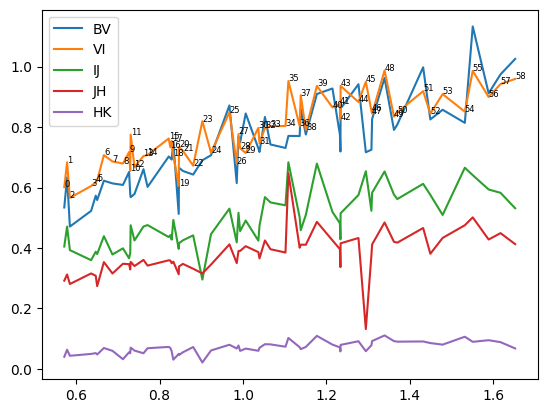

In [48]:
for i, m in enumerate(mag):
    if i == 5:
        break
    m1 = data[f'{m}_mag']-data['EBV']*R[m]
    m2 = data[f'{mag[i+1]}_mag']-data['EBV']*R[mag[i+1]]
#    m1 = data[f'M_{m}'] + data.HST + data.EBV * R[m]
#    m2 = data[f'{mag[i]}_mag']
    plt.plot(X, m1-m2, label=m+mag[i+1])
    if i == 1:
        for k in range(0,len(data)):
            plt.annotate('%i'%(k), xy =(X.iloc[k], m1[k]-m2[k]), fontsize = 6)
plt.legend()

# Wesenheit deviation

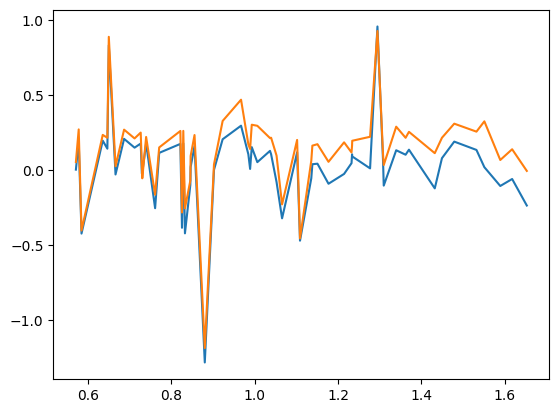

In [42]:
from data.datamapping import R123

wesen = pd.DataFrame()
for a,c1 in enumerate(mag):
    for b,c2 in enumerate(mag[a+1:]):
        for c,m in enumerate(mag):
            Rm12 = R123(m,c1,c2, R)
            wes_str = m+c1+c2
            wesen[wes_str] = data[f'{m}_mag'] - Rm12*(data[f'{c1}_mag'] - data[f'{c2}_mag']) - data.IRSB

plt.plot(data.logP, data.Wvi - wesen['VVI'])
plt.plot(data.logP, data.Wvi - wesen['BBI'])


VI


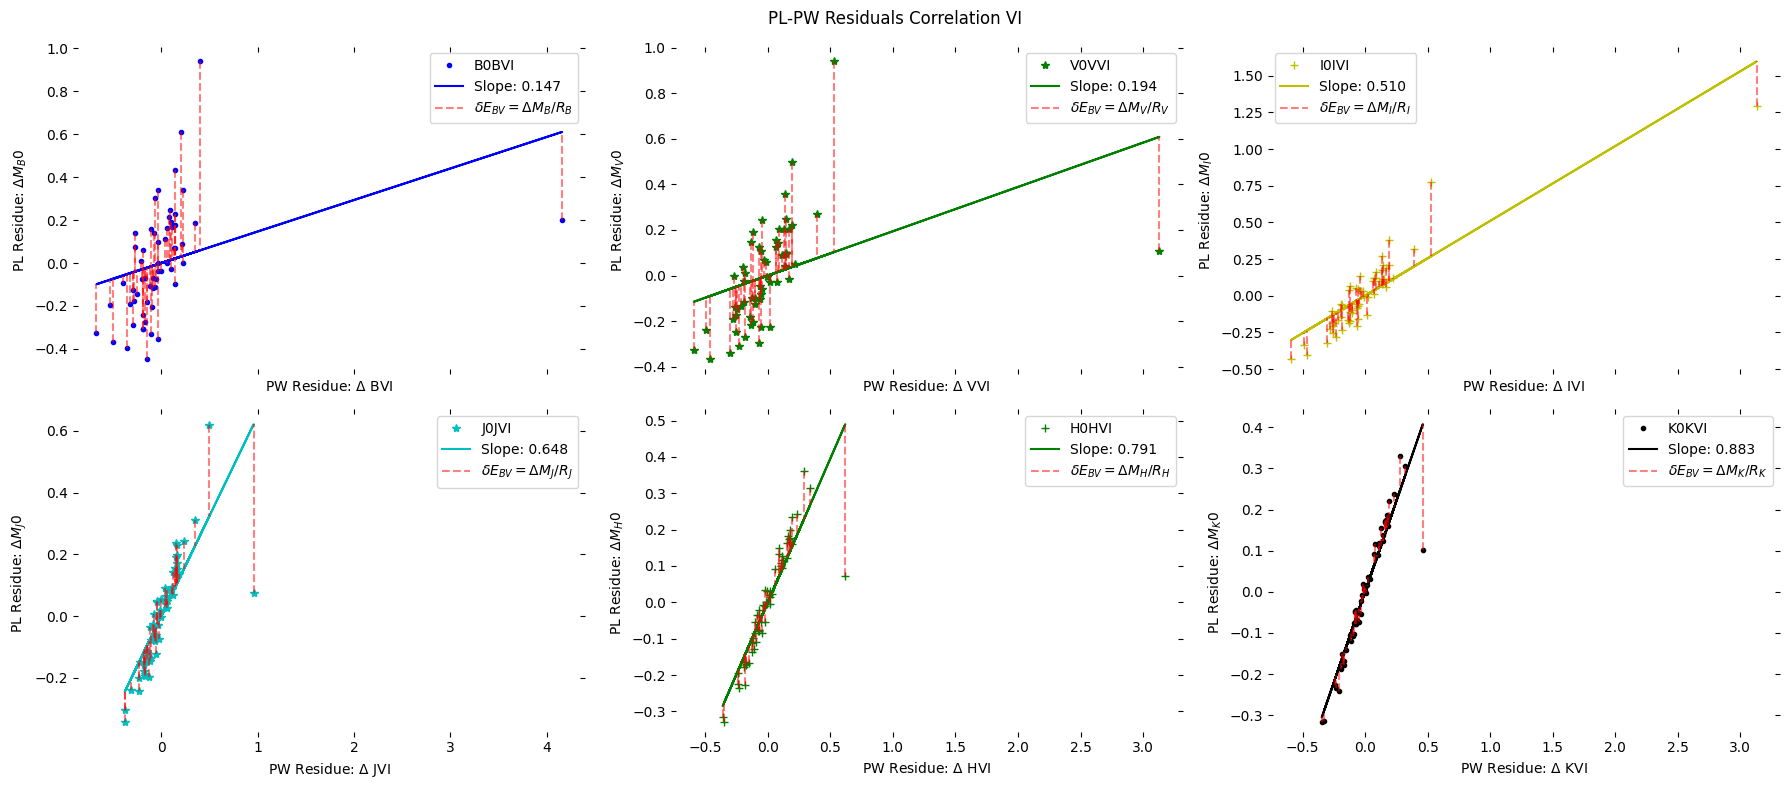

IK


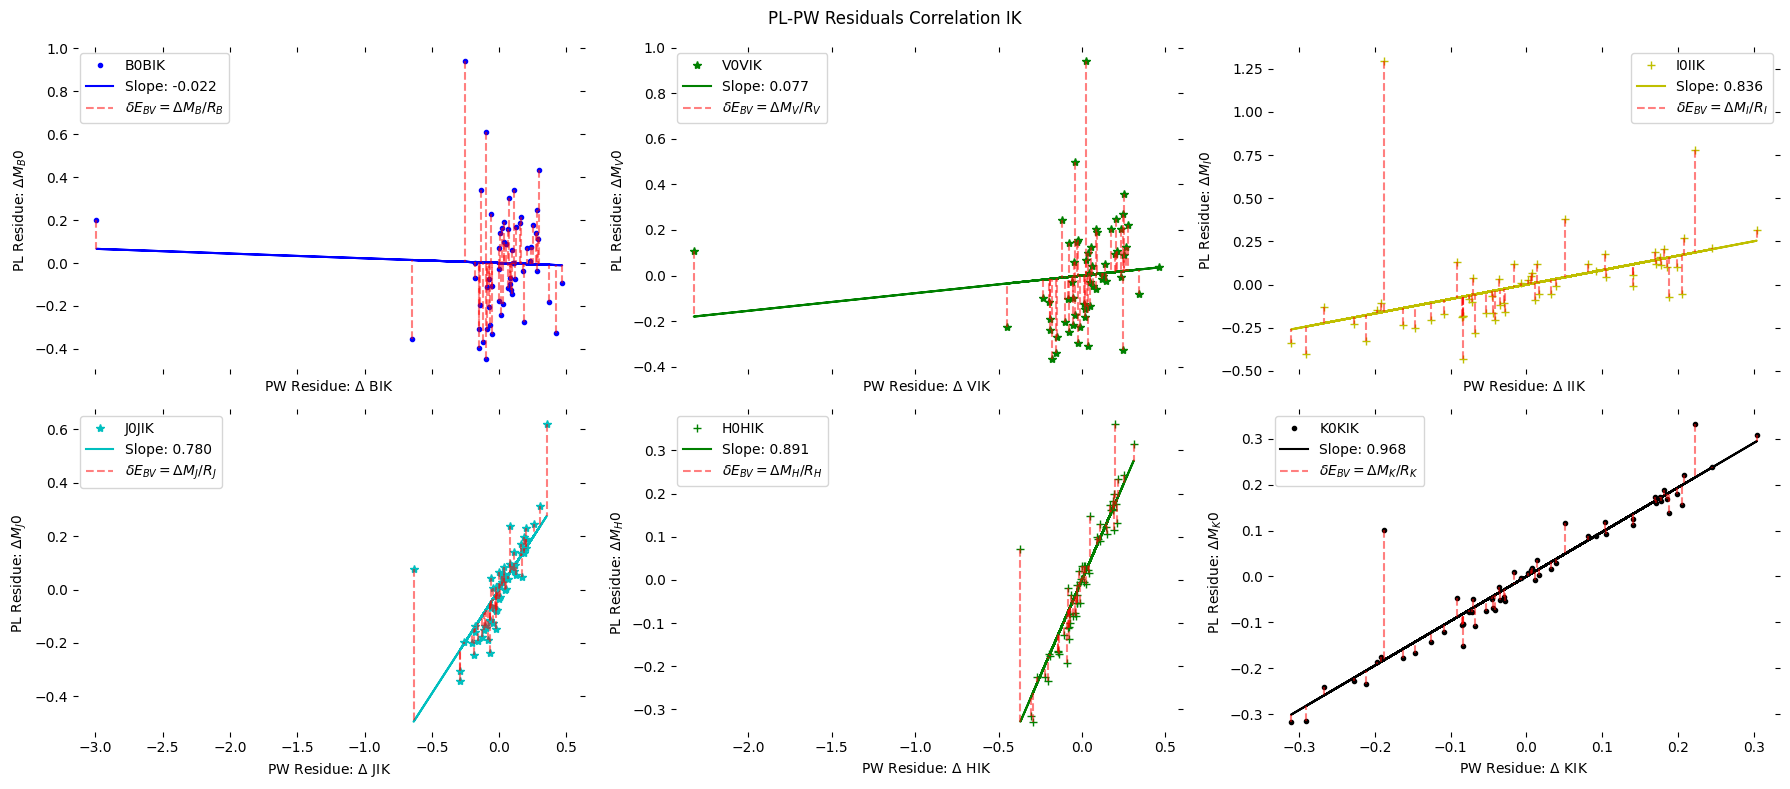

JH


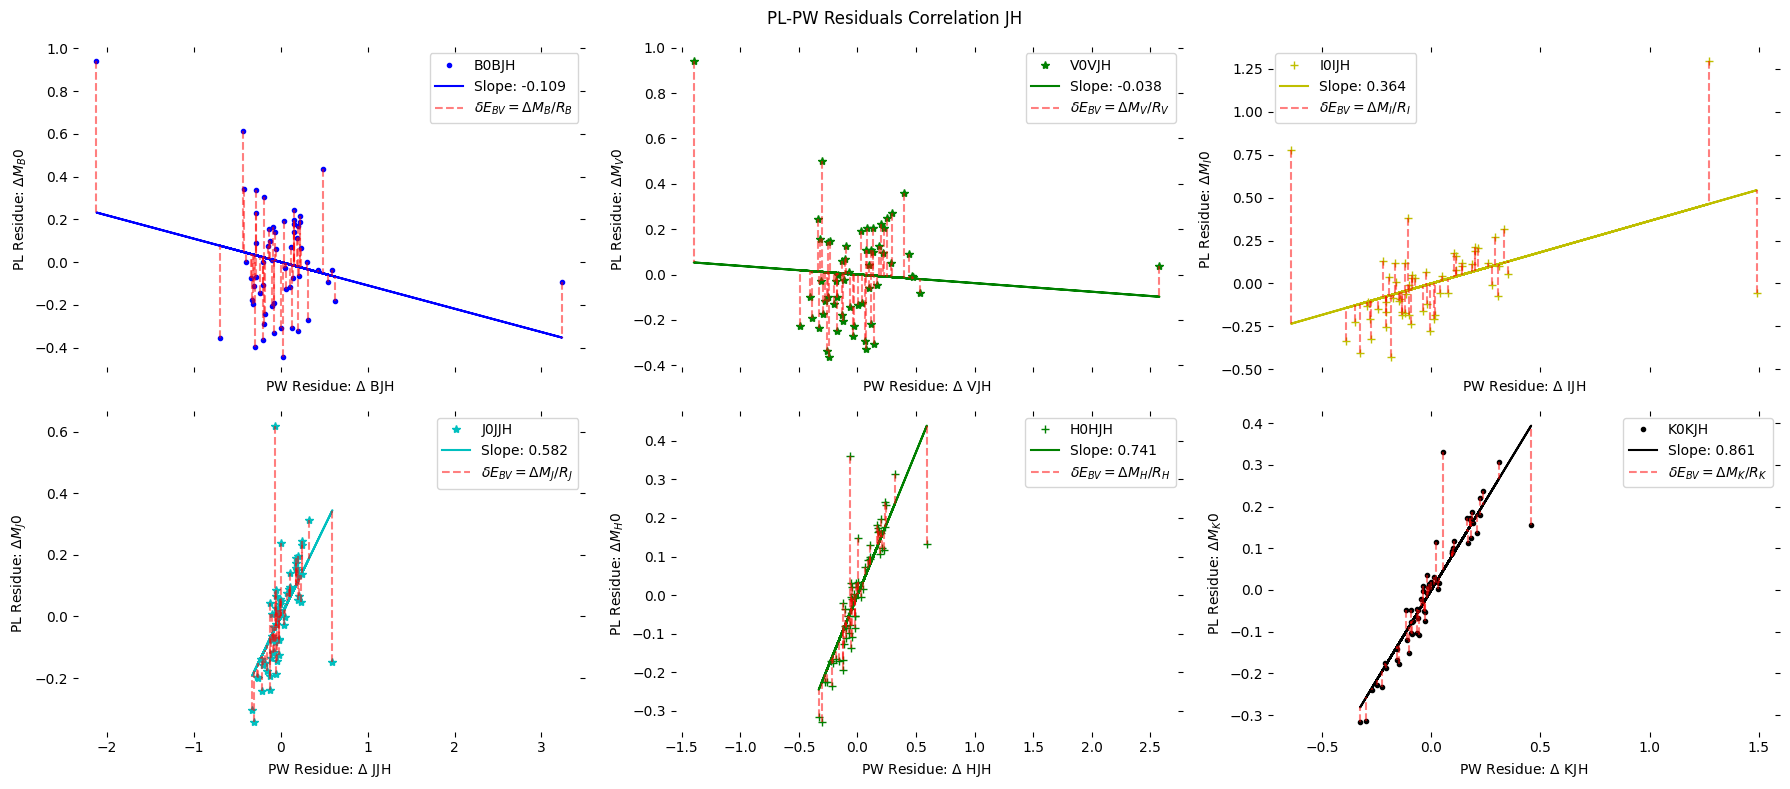

JK


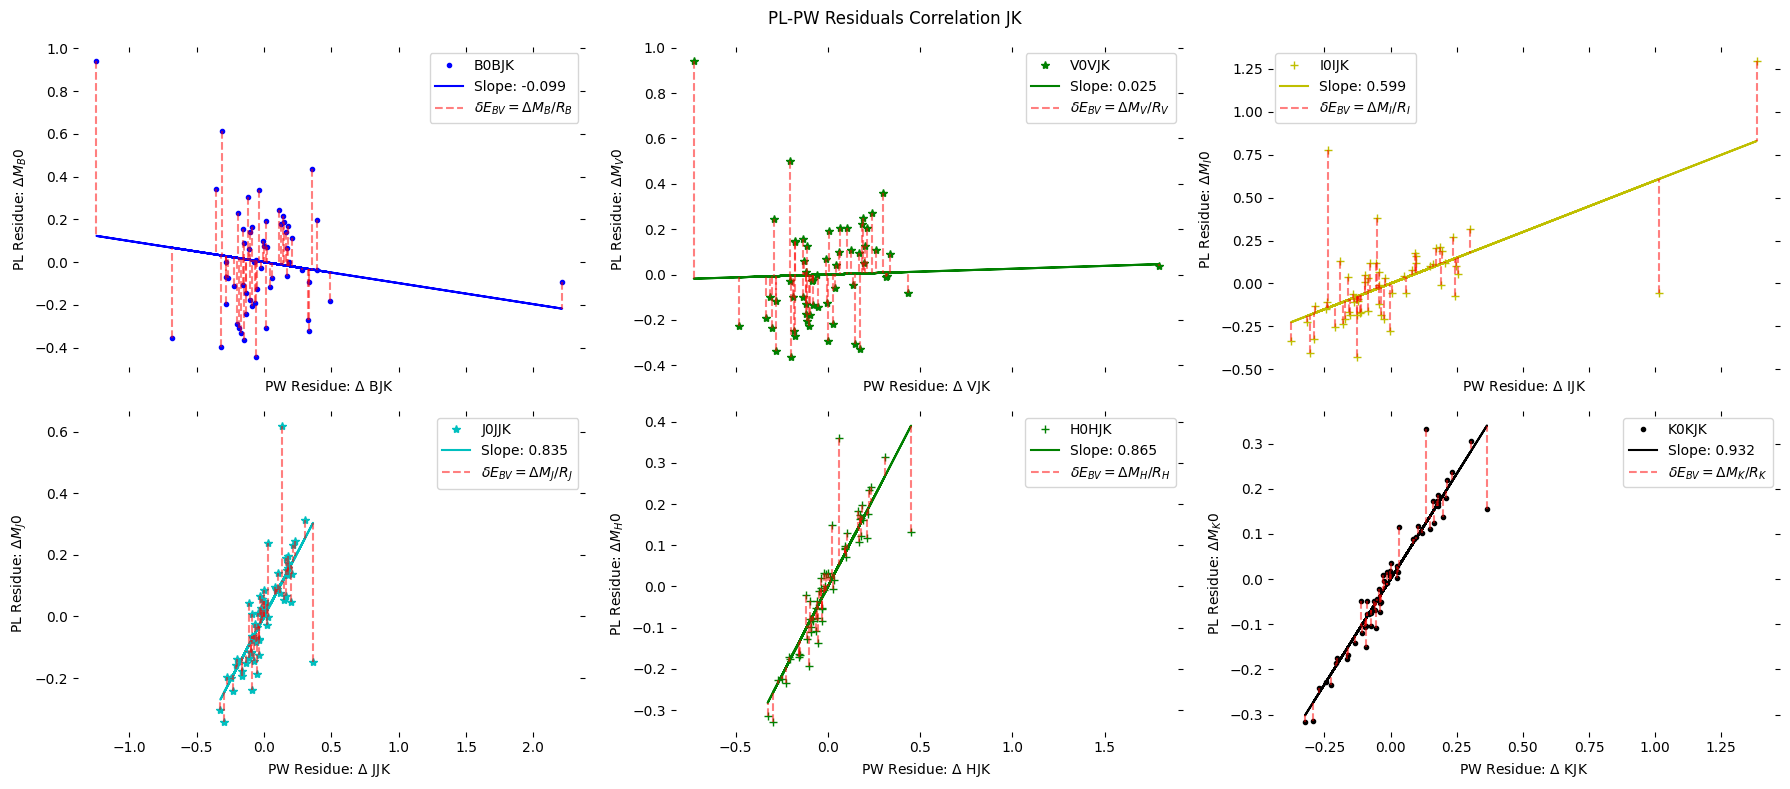

[None, None, None, None]

In [46]:
from lvtlaw.d_del_del import *
from lvtlaw.g_result import *
from lvtlaw.h_loadoutput import *
from data.datamapping import *
n=59
dis_flag = ['_p', '_j', '_h']
dis_list = ['IRSB', 'gplx', 'HST']
file_name = f'{n}_IRSB_plx'
ex = ['_F', '_S']
dd=['VI', 'IK', 'JH', 'JK']
data_out_pf=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}{ex[0]}/'
data_out_jf=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}{ex[0]}/'
data_out_hf=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}{ex[0]}/'
data_out_ps=f'./data/processed/{file_name}{dis_flag[0]}_{R_v}{ex[1]}/'
data_out_js=f'./data/processed/{file_name}{dis_flag[1]}_{R_v}{ex[1]}/'
data_out_hs=f'./data/processed/{file_name}{dis_flag[2]}_{R_v}{ex[1]}/'
#dmc, dpre, dres, merged_data = residual_correlation_(data_out_p, n) 
#[plotdeldel6(merged_data, dmc, col, dis_flag[0], 'S', '0', 0) for col in dd]

dmc, dpre, dres, merged_data = residual_correlation_(data_out_hf, n) 
[plotdeldel6(merged_data, dmc, col, dis_flag[2], 'S', '0', 0) for col in dd]